In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('c:/projects/datasets/fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

In [5]:
# due to the compute power required, only use 30% of the data
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)
fashion_mnist_df.shape

(18000, 785)

In [6]:
LOOKUP = {0: 'T-shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

In [7]:
# create a helper function that displays a single image
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [8]:
# extract the features to train the model
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [9]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,113,23,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,139,...,185,174,188,171,0,0,0,0,0,0


In [10]:
Y.head()

0    5
1    5
2    1
3    5
4    0
Name: label, dtype: int64

In [11]:
# look at values of the first 100 pixels
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Actual label:  Ankle boot


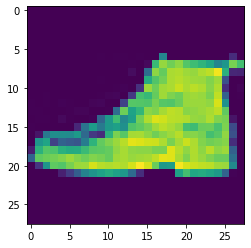

In [13]:
# use the helper function defined earlier
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Coat


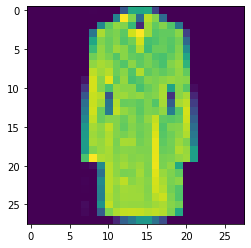

In [15]:
display_image(X.loc[567].values, Y.loc[567])

Actual label:  Bag


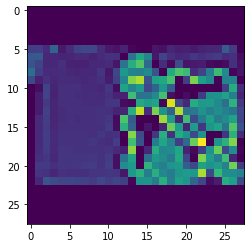

In [16]:
display_image(X.loc[15088].values, Y.loc[15088])

In [17]:
# scale all our features so they are between 0 and 1
X = X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.443137,0.090196,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545098,...,0.725490,0.682353,0.737255,0.670588,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [20]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [29]:
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    # for multi-class classification return a weighted average score of precision and recall for each label
    # the weight depends on the number of true instances of each label
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print('Test data count: ',len(y_test))
    print('accuracy_count: ', num_acc)
    print('accuracy_score: ', acc)
    print('precision_score: ', prec)
    print('recall_score: ', recall)

In [30]:
# use solver='sag' rather than 'liblinear'
# this is an optimization algorithm to handle mutinomial loss for multiclass classification, converges faster for large datasets
# solver='liblinear' does not handle multinomial loss, performs multiclass classification using one-versus-rest scheme
# by setting multi_class='auto' - we are leaving up to the logistic regression estimator to select the right kind of problem to 
# fit based on whether we perform binary classification or multiclass classification
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [31]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 3, 9, ..., 2, 4, 2], dtype=int64)

In [32]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count:  3032
accuracy_score:  0.8422222222222222
precision_score:  0.8417322010515293
recall_score:  0.8422222222222222
